## Logistic Regression Part (II)

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [9]:
X , y = make_classification(n_samples=100,
                            n_features=2,
                            n_classes=2,
                            n_clusters_per_class=1,
                            class_sep=20,
                            random_state=41,
                            n_informative=1,
                            n_redundant=0,
                            hypercube=False)

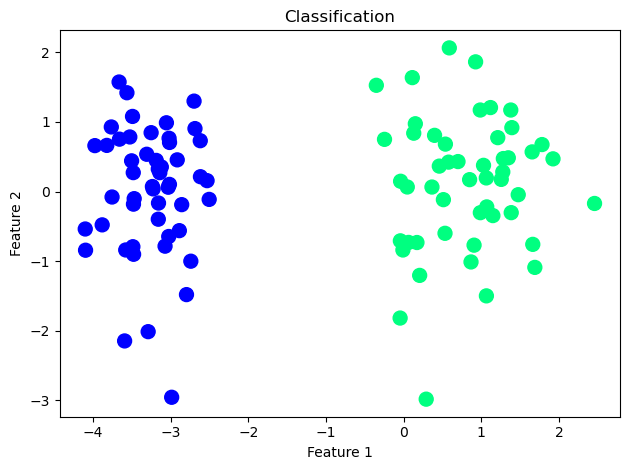

In [10]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.title("Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()

In [26]:
def gradient_descent(X, y):
    X = np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.01
    epochs=100000
    for i in range(epochs):
        y_hat = sigmoid(np.dot(X, weights))
        weights = weights - lr*(1/X.shape[0])*(np.dot( (y_hat-y) , X ))
    return weights[0], weights[1:]

In [27]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [28]:
bias , weight = gradient_descent(X, y)
print("w0 : ", bias)
print("w1, w2: ", weight)

w0 :  4.929759757105457
w1, w2:  [4.21443924 0.16022654]


(-3.0, 2.0)

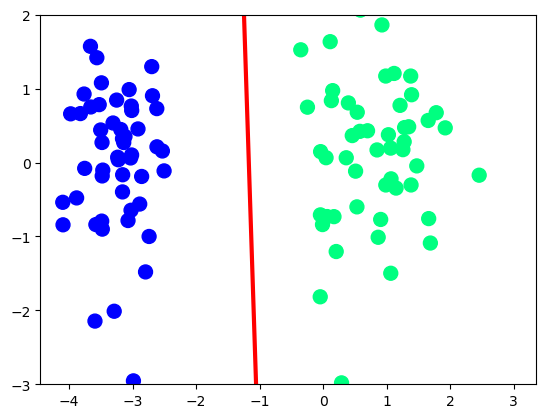

In [29]:
m = -(weight[0]/weight[1])
b = -(bias/weight[1])
x_input = np.linspace(-3,3, 100)
y_input = m*x_input + b

plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(X[:,0], X[:,1],  cmap='winter', c=y, s=100)
plt.ylim(-3,2)

## Comparison with Sklearn's model

In [30]:
model = LogisticRegression(penalty='none', solver='sag')
model.fit(X, y)
print("W0: ", model.intercept_)
print("W1 and W2 : ", model.coef_)

W0:  [5.75043925]
W1 and W2 :  [[4.78258737 0.20699722]]


C:\Users\ASCC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ASCC\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(-3.0, 2.0)

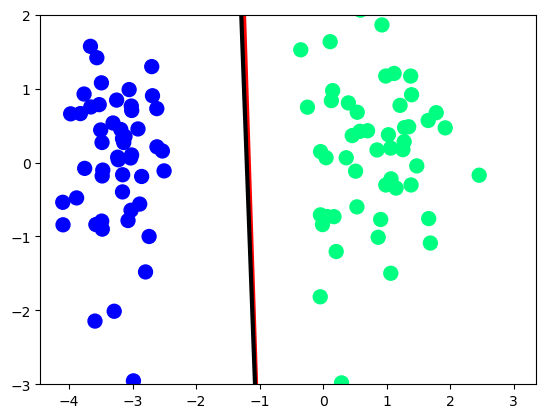

In [31]:
m = -(model.coef_[0][0]/model.coef_[0][1])
b = -(model.intercept_/model.coef_[0][1])

x_input1 = np.linspace(-3,3, 100)
y_input1 = m*x_input + b

plt.plot(x_input, y_input, color='red', linewidth=3) #Perceptron Algorithm
plt.plot(x_input1, y_input1, color='black', linewidth=3) #LogisticRegression()
plt.scatter(X[:,0], X[:,1],  cmap='winter', c=y, s=100)
plt.ylim(-3,2)